This notebook computes the lag-energy spectrum from the saved cross spectrum.

In [1]:
import numpy as np
from astropy.table import Table, Column
from astropy.io import fits
from scipy.stats import binned_statistic
import os
import subprocess
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter, NullFormatter
import matplotlib.colors as colors
from matplotlib._color_data import XKCD_COLORS as xkcdcolor
%matplotlib inline
from xcor_tools import find_nearest, pairwise, Energy_lags
font_prop = font_manager.FontProperties(size=20)

In [6]:
homedir = os.path.expanduser("~")
maxi_dir = homedir+"/Dropbox/Research/MAXIJ1535_B-QPO"
cs_file = maxi_dir+"/out/MAXIJ1535_64sec_256dt_ratecut_cs.fits"
assert os.path.isfile(cs_file)

cs_tab = Table.read(cs_file, format='fits')
print(cs_tab.info)
print(cs_tab.meta)

cs2_file = maxi_dir+"/out/MAXIJ1535_64sec_256dt_window4_cs.fits"
assert os.path.isfile(cs2_file)

cs2_tab = Table.read(cs2_file, format='fits')

<Table length=16384>
   name     dtype    shape    unit                 description               
--------- ---------- ----- --------- ----------------------------------------
FREQUENCY    float32              Hz                        Fourier frequency
PSD_BROAD    float64       abs rms^2 PSD of all MPUs, 3-10 keV, w Poiss noise
  PSD_REF    float64       abs rms^2                   Ref PSD, w Poiss noise
   PSD_CI    float64 (62,) abs rms^2                    CI PSD, w Poiss noise
    CROSS complex128 (62,)                             CS, unnorm, unfiltered

OrderedDict([('OBJECT', 'MAXI_J1535-571'), ('INST', 'NICER'), ('TODAY', '2018-07-03 18:32:14.850303'), ('TYPE', 'Segments selected on rms and hr'), ('INFILE', '/Users/abbie/Dropbox/Research/MAXIJ1535_B-QPO/in/bqpo_ratecut_evtlists.txt'), ('EXPOSURE', 27392), ('N_BINS', 16384), ('DT', 0.00390625), ('DF', 0.015625), ('N_CHANS', 62), ('CHBINFIL', '/Users/abbie/Dropbox/Research/MAXIJ1535_B-QPO/in/chbinfile.txt'), ('DETFILE', '/Users

In [7]:
rsp_matrix_file = maxi_dir+"/nicer_v1.02rbn.rsp"
assert os.path.isfile(rsp_matrix_file)
rsp = Table.read(rsp_matrix_file, format='fits', hdu='EBOUNDS')
energy_list = np.asarray([np.mean([x, y]) for x,y in zip(rsp['E_MIN'], rsp['E_MAX'])])
e_chans = rsp['CHANNEL']
energy_step = energy_list - rsp['E_MIN']

In [11]:
# lf = 0.1
# hf = 2.0
# lag_string="bbn"
# bbn_lags = Energy_lags(cs_tab, low_freq_bound=lf, high_freq_bound=hf, debug=False)
# print(bbn_lags.energy_tab.info)
# bbn_lags.energy_tab.write(maxi_dir+"/out/lags_%s.fits" % (lag_string), format='fits', overwrite=True)

lf = 4.29
hf = 7.15
lag_string = "qpo"
qpo_lags = Energy_lags(cs_tab, low_freq_bound=lf, high_freq_bound=hf, debug=False)
print(qpo_lags.energy_tab.info)
qpo_lags.energy_tab.write(maxi_dir+"/out/lags_%s.fits" % (lag_string), format='fits', overwrite=True)

lag_string = "both"


# lf = 4.29
# hf = 7.15
# lag_string = "win4-qpo"
# qpo2_lags = Energy_lags(cs2_tab, low_freq_bound=lf, high_freq_bound=hf, debug=False)
# print(qpo2_lags.energy_tab.info)
# qpo2_lags.energy_tab.write(maxi_dir+"/out/lags_%s.fits" % (lag_string), format='fits', overwrite=True)

# lag_string="win_compare"

lf = 9.6
hf = 12.6
lag_string = "harmonic"
harmonic_lags = Energy_lags(cs_tab, low_freq_bound=lf, high_freq_bound=hf, debug=False)
# print(harmonic_lags.energy_tab.info)
harmonic_lags.energy_tab.write(maxi_dir+"/out/lags_%s.fits" % (lag_string), format='fits', overwrite=True)

lag_string = "all"


<Table length=62>
   name    dtype  unit        description        
--------- ------- ---- --------------------------
  CHANNEL   int64 chan Energy channel of interest
PHASE_LAG float64  rad                  Phase lag
PHASE_ERR float64  rad         Error on phase lag
 TIME_LAG float64    s                   Time lag
 TIME_ERR float64    s          Error on time lag



In [9]:
# ## Putting the time lags in units of milliseconds
# tlag = lags.energy_tab['TIME_LAG'] / 1e-3
# tlag_err = lags.energy_tab['TIME_ERR'] / 1e-3

# fig, ax = plt.subplots(1, 1, figsize=(9,6.75), dpi=300, tight_layout=True)
# ax.hlines(0.0, 1, 10.2, linestyle='dashed', lw=2, color='black')
# ax.errorbar(energy_list[:-2], tlag[:-2], xerr=energy_step[:-2], 
#             yerr=tlag_err[:-2], lw=3, drawstyle='steps-mid', ls='none', 
#             ms=10, mew=2, mec="black", mfc='black',
#             color="black", ecolor="black", elinewidth=3, capsize=0)

# ## BBN:
# ax.set_ylim(-70, 130)
# ax.text(1.06, 116, 'a', fontsize=28, color='blue')
# ax.text(6.66, 116, r'%.1f$-$%.0f$\,$Hz' % (lf,hf), fontsize=20)
# yLocator = MultipleLocator(10)  ## loc of minor ticks on y-axis
# ax.yaxis.set_major_locator(MultipleLocator(20))

# ## QPO:
# # ax.set_ylim(-28, 80)
# # ax.text(1.08, 72, 'b', fontsize=28, color='blue')
# # ax.text(5.44, 72, r'%.2f$-$%.2f$\,$Hz' % (lf,hf), fontsize=20)
# # yLocator = MultipleLocator(5)  ## loc of minor ticks on y-axis

# # ## Harmonic
# # ax.set_ylim(-45, 55)
# # ax.text(1.05, 48, 'c', fontsize=28, color='blue')
# # ax.text(5.8, 48, r'%.1f$-$%.1f$\,$Hz' % (lf,hf), fontsize=20)
# # yLocator = MultipleLocator(5)  ## loc of minor ticks on y-axis

# ax.yaxis.set_minor_locator(yLocator)
# ax.set_ylabel(r'Time lag (ms)', fontproperties=font_prop)
# ax.set_xlabel('Energy (keV)', fontproperties=font_prop)
# ax.set_xlim(1, 10.2)
# ax.set_xscale('log')
# x_maj_loc = [1,2,3,4,5,6,8,10]
# ax.set_xticks(x_maj_loc)
# xLocator = MultipleLocator(1)  ## loc of minor ticks on x-axis
# ax.xaxis.set_minor_locator(xLocator)
# ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.xaxis.set_minor_formatter(NullFormatter())
# ax.tick_params(axis='x', labelsize=20, bottom=True, top=True,
#                 labelbottom=True, labeltop=False, direction="in")
# ax.tick_params(axis='y', labelsize=20, left=True, right=True,
#                 labelleft=True, labelright=False, direction="in")
# ax.tick_params(which='major', width=1.5, length=9, direction="in")
# ax.tick_params(which='minor', width=1.5, length=6, direction="in")
# for axis in ['top', 'bottom', 'left', 'right']:
#     ax.spines[axis].set_linewidth(1.5)
# # plotfile = "lags_%s.eps" % (lag_string)
# # plotfile = "lags_HARDER_%s.eps" % (lag_string)
# # plt.savefig(maxi_dir+"/out/"+plotfile, dpi=300)
# plt.show()

lags_phase_all.eps


/anaconda3/envs/maxij1535/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


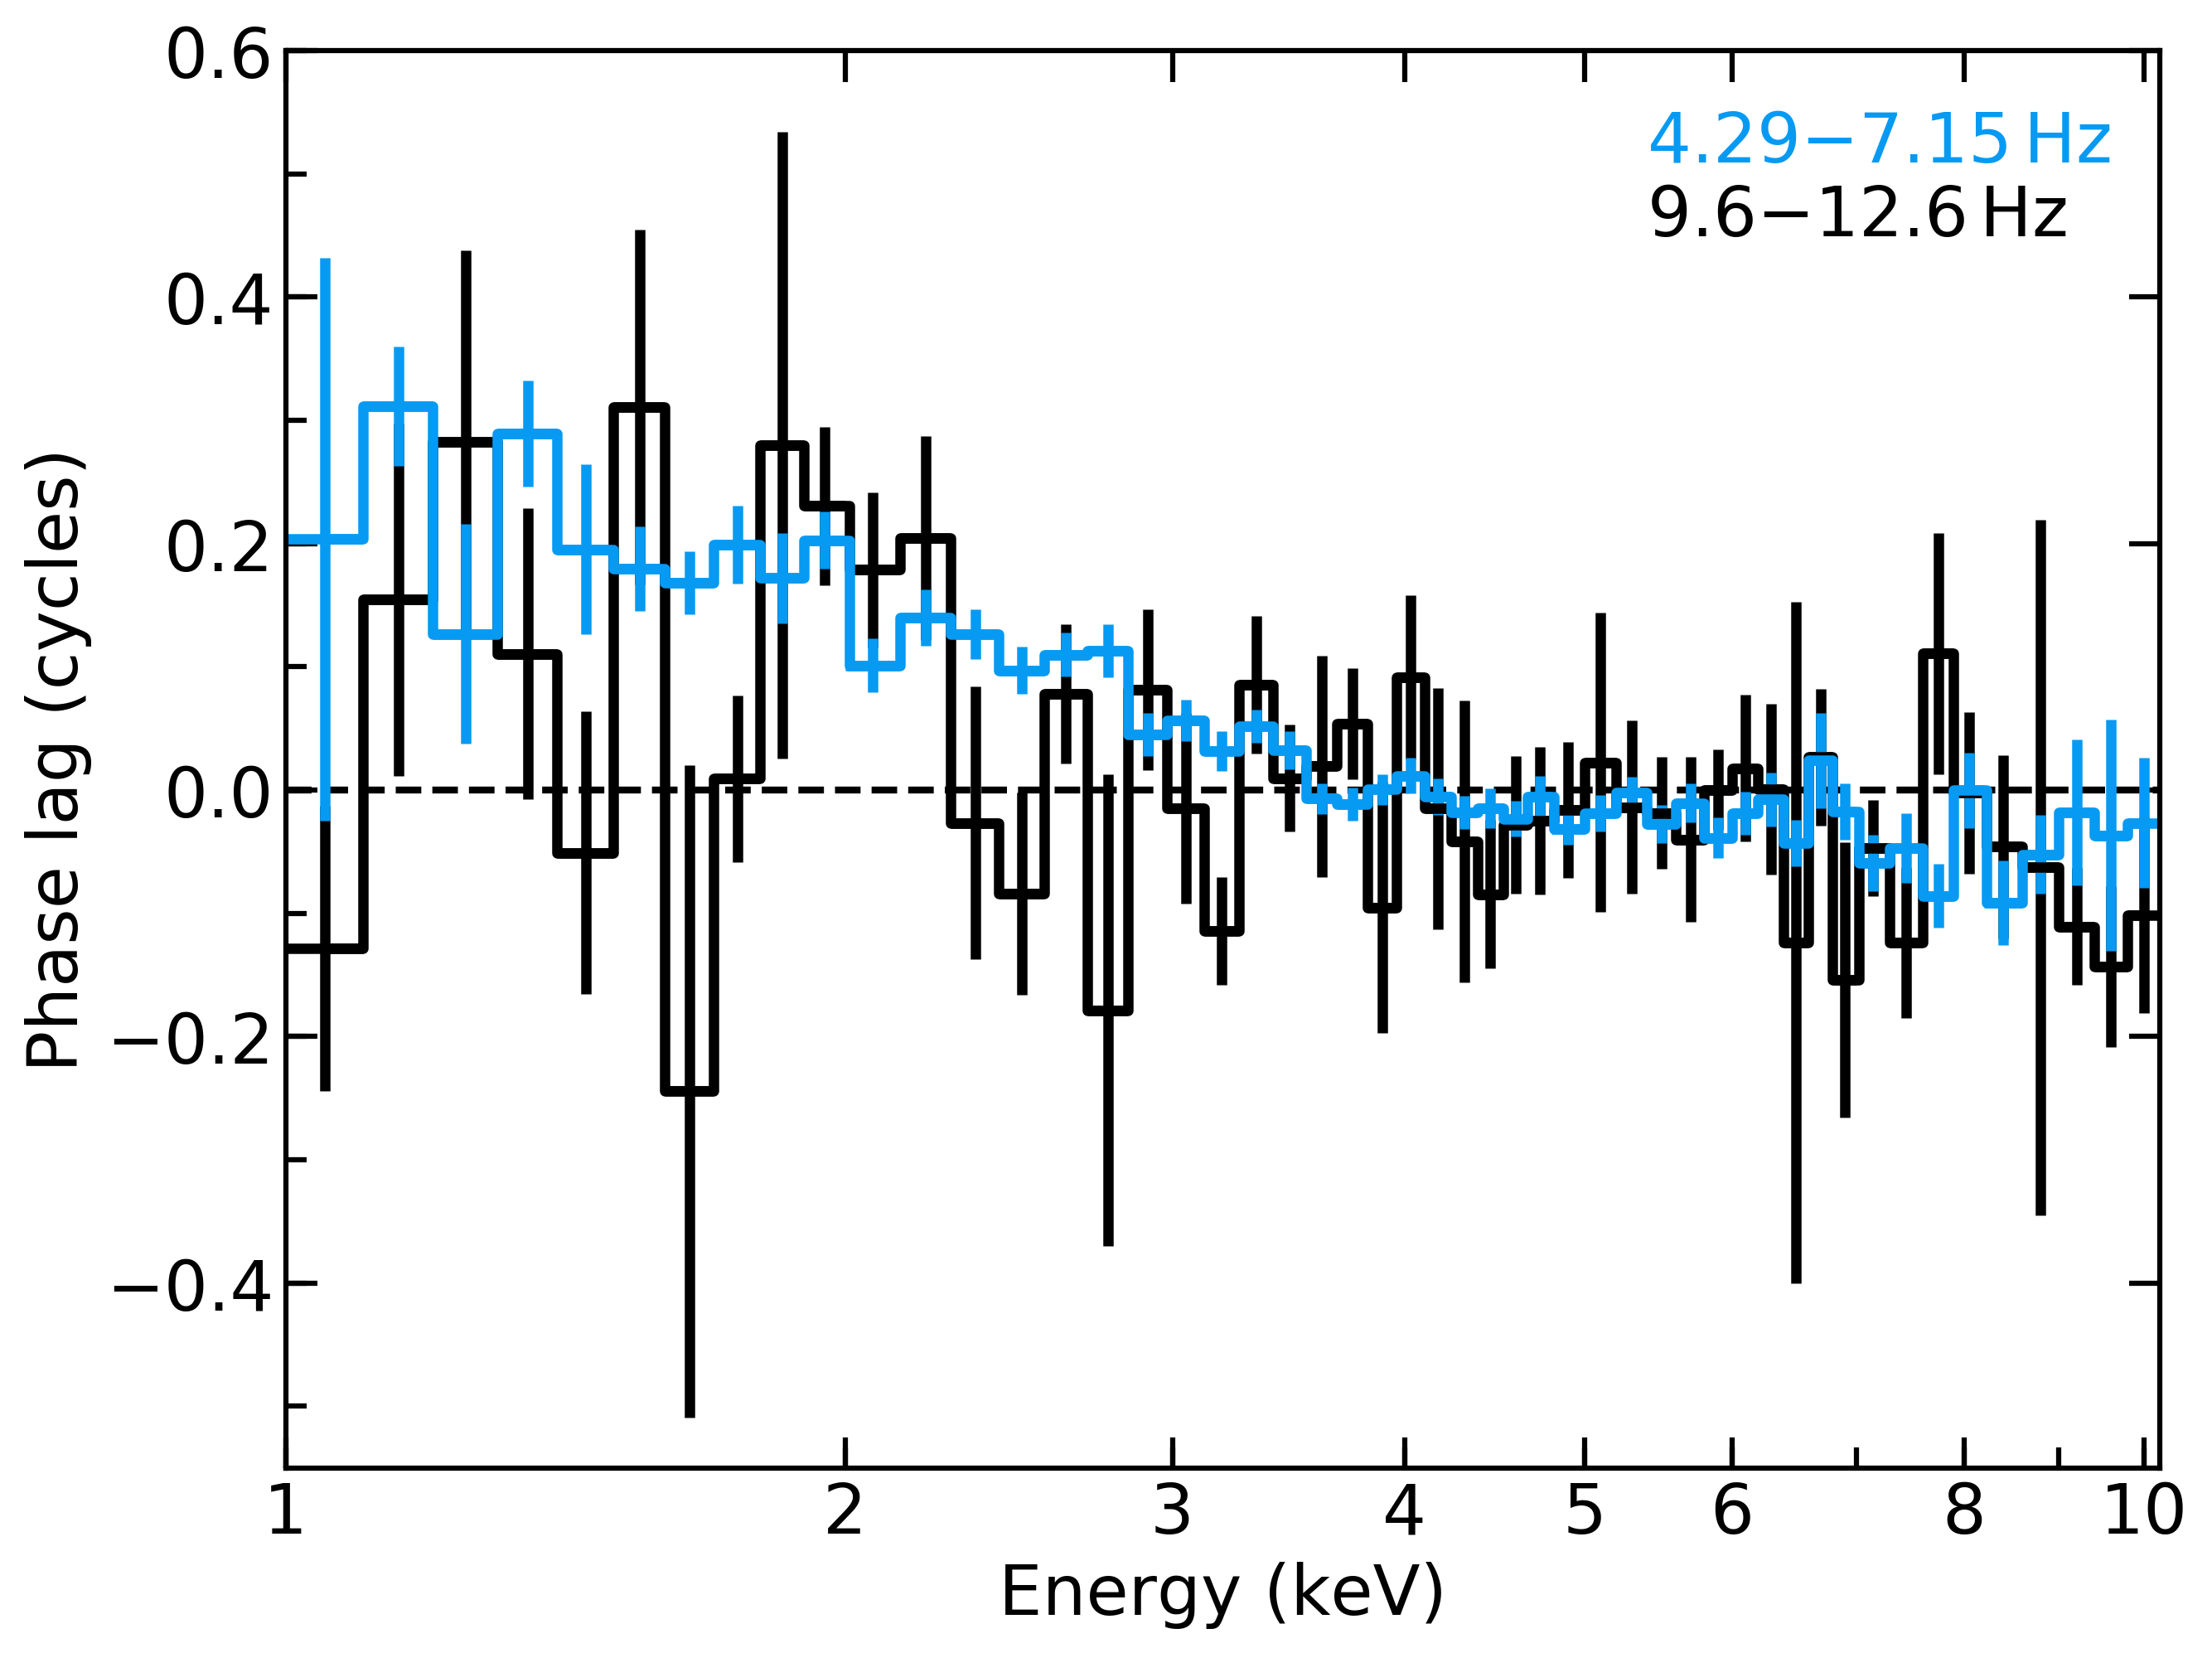

In [18]:
# bbn_plag = bbn_lags.energy_tab['PHASE_LAG'] / (2*np.pi)
# bbn_plag_err = bbn_lags.energy_tab['PHASE_ERR'] / (2*np.pi)
qpo_plag = qpo_lags.energy_tab['PHASE_LAG'] / (2*np.pi)
qpo_plag_err = qpo_lags.energy_tab['PHASE_ERR'] / (2*np.pi)
harmonic_plag = harmonic_lags.energy_tab['PHASE_LAG'] / (2*np.pi)
harmonic_plag_err = harmonic_lags.energy_tab['PHASE_ERR'] / (2*np.pi)
# qpo2_plag = qpo2_lags.energy_tab['PHASE_LAG'] / (2*np.pi)
# qpo2_plag_err = qpo2_lags.energy_tab['PHASE_ERR'] / (2*np.pi)

fig, ax = plt.subplots(1, 1, figsize=(9,6.75), dpi=300, tight_layout=True)
ax.hlines(0.0, 1, 10.2, linestyle='dashed', lw=2, color='black')
ax.errorbar(energy_list[10:-2], harmonic_plag[10:-2], xerr=energy_step[10:-2], 
            yerr=harmonic_plag_err[10:-2], lw=3, drawstyle='steps-mid', 
            ms=10, mew=2, mec="black", mfc='black',
            color="black", ecolor="black", elinewidth=3, capsize=0)
# ax.errorbar(energy_list[10:-2], qpo2_plag[10:-2], xerr=energy_step[10:-2], 
#             yerr=qpo2_plag_err[10:-2], lw=3, drawstyle='steps-mid',
#             ms=10, mew=2, mec="green", mfc='green',
#             color="green", ecolor="green", elinewidth=3, capsize=0)
ax.errorbar(energy_list[10:-2], qpo_plag[10:-2], xerr=energy_step[10:-2], 
            yerr=qpo_plag_err[10:-2], lw=3, drawstyle='steps-mid',
            ms=10, mew=2, mec=xkcdcolor['xkcd:azure'], mfc=xkcdcolor['xkcd:azure'],
            color=xkcdcolor['xkcd:azure'], ecolor=xkcdcolor['xkcd:azure'], 
            elinewidth=3, capsize=0)
# ax.errorbar(energy_list[10:-2], bbn_plag[10:-2], xerr=energy_step[10:-2], 
#             yerr=bbn_plag_err[10:-2], lw=3, drawstyle='steps-mid', 
#             ms=10, mew=2, mec="red", mfc='red',
#             color="red", ecolor="red", elinewidth=3, capsize=0)

## BBN:
# ax.set_ylim(-0.1, 0.2)
# ax.text(6.66, 0.18, r'%.1f$-$%.0f$\,$Hz' % (lf,hf), fontsize=20)
# yLocator = MultipleLocator(0.01)  ## loc of minor ticks on y-axis
# ax.yaxis.set_major_locator(MultipleLocator(0.05))

## QPO:
# ax.set_ylim(-0.15, 0.45)
# ax.text(5.4, 0.405, r'0.1$-$2$\,$Hz', fontsize=20, color='red')
# ax.text(5.4, 0.375, r'4.29$-$7.15$\,$Hz', fontsize=20, color=xkcdcolor['xkcd:azure'])
# ax.text(5.4, 0.375, r'Normal', fontsize=20, color=xkcdcolor['xkcd:azure'])
# ax.text(5.4, 0.405, r'Window 4', fontsize=20, color='green')
# yLocator = MultipleLocator(0.05)  ## loc of minor ticks on y-axis

# ## Harmonic
ax.set_ylim(-0.55, 0.6)
ax.text(5.4, 0.45, r'9.6$-$12.6$\,$Hz', fontsize=20, color='black')
ax.text(5.4, 0.51, r'4.29$-$7.15$\,$Hz', fontsize=20, color=xkcdcolor['xkcd:azure'])


yLocator = MultipleLocator(0.1)  ## loc of minor ticks on y-axis

ax.yaxis.set_minor_locator(yLocator)
ax.set_ylabel(r'Phase lag (cycles)', fontproperties=font_prop)
ax.set_xlabel('Energy (keV)', fontproperties=font_prop)
ax.set_xlim(1, 10.2)
ax.set_xscale('log')
x_maj_loc = [1,2,3,4,5,6,8,10]
ax.set_xticks(x_maj_loc)
xLocator = MultipleLocator(1)  ## loc of minor ticks on x-axis
ax.xaxis.set_minor_locator(xLocator)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
ax.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=True, labeltop=False, direction="in")
ax.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax.tick_params(which='major', width=1.5, length=9, direction="in")
ax.tick_params(which='minor', width=1.5, length=6, direction="in")
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
plotfile = "lags_phase_%s.eps" % (lag_string)
print(plotfile)
plt.savefig(maxi_dir+"/out/"+plotfile, dpi=300)
plt.show()